In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
from os.path import dirname,join
import sys
import csv
import __main__
import json

sys.path.append('/home/mht/PythonProjects/dbo')
from src.benchmark_functions_2D import *
from matplotlib import cm

import pandas as pd
import seaborn as sns
import itertools

# colors = ['navy','darkblue','mediumblue','blue']
colors = ['m','g','b','c']

# result_to_dump = 'ackley/query_dist_3'

result_to_dump = 'rosenbrock/query_dist_3'
function_dict = {'bird':Bird(), 'disk':Disk(), 'ackley': Ackley(), 'rosenbrock': Rosenbrock(),
                 'eggholder': Eggholder()}
obj = function_dict.get(result_to_dump.split('/')[0])
objective = lambda x: - obj.function(x)
SLIDES = True
# sns.set(style="darkgrid")
grid_elemets = []
for [i,j] in obj.domain:
    grid_elemets.append(np.linspace(i, j, 100))
_grid = np.array(list(itertools.product(*grid_elemets)))
root_dir = '/home/mht/PythonProjects/dbo'
results_dir = join(join(root_dir, 'result'), result_to_dump)

def load_data():
    dirs = [dir for dir in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, dir))]
    i = 2
    dfs = []
    for result_dir in sorted(dirs):
        file_dir = join(join(join(root_dir, 'result'), result_to_dump), result_dir)
        dfs.append(pd.read_csv(os.path.join(file_dir, 'data/data.csv')))

    return dfs




In [13]:
results_dir

'/home/mht/PythonProjects/dbo/result/rosenbrock/query_dist_3'

In [14]:
dfs = load_data()
df = pd.concat(dfs, ignore_index=True)

In [15]:
def get_queries(alg, start_iter, to_iter, df):
    df_alg = df[df['alg']==alg]
    a1x1 = df_alg[(df_alg['iteration']<=to_iter) & (df_alg['iteration']>=start_iter)]['agent1_x1'].values
    a1x2 = df_alg[(df_alg['iteration']<=to_iter) & (df_alg['iteration']>=start_iter)]['agent1_x2'].values
    aox1 = np.concatenate([df_alg[(df_alg['iteration']<=to_iter) & (df_alg['iteration']>=start_iter)]['agent{}_x1'.format(i+2)].values for i in range(9)])
    aox2 = np.concatenate([df_alg[(df_alg['iteration']<=to_iter) & (df_alg['iteration']>=start_iter)]['agent{}_x2'.format(i+2)].values for i in range(9)])
    # y = np.concatenate([df[df['iteration']<=to_iter]['agent{}_obs'.format(i+1)].values for i in range(5)])
    return a1x1, a1x2, aox1, aox2

def get_argmax_mean(alg, iter, df):
    df_alg = df[df['alg']==alg]
    x1 = df_alg[df_alg['iteration'] == iter]['argmax_mean_x1'].values
    x2 = df_alg[df_alg['iteration'] == iter]['argmax_mean_x2'].values
    # aox1 = np.concatenate([df_alg[df_alg['iteration'] == iter]['agent{}_x1'.format(i+2)].values for i in range(4)])
    # aox2 = np.concatenate([df_alg[df_alg['iteration'] == iter]['agent{}_x2'.format(i+2)].values for i in range(4)])
    # y = np.concatenate([df[df['iteration']<=to_iter]['agent{}_obs'.format(i+1)].values for i in range(5)])
    return x1, x2

get_argmax_mean('BUCB', 10, df)

(array([-0.00684531]), array([-0.01779343]))

[ 1.96871003 -1.04167984  0.2390584   1.47840566 -1.00605885 -0.44564316
  0.13772811 -1.00689373  1.02323315] [ 1.35649448  1.93718481  0.07532626  2.97362088  2.99143193  0.79071316
 -0.93729554  0.11174143 -0.09729019]
[-0.41835712] [-0.07762145]
[-2.          1.17241379  2.          2.         -0.06896552 -2.
 -0.75862069  1.31034483  0.67460308] [ 3.          3.          0.37931034  3.         -1.          0.51724138
  1.48275862  1.20689655  1.46367803]
[2.] [3.]
[-0.26971183  0.93896005  0.26884129  1.55113963  1.51928804  1.5145442
  0.03463914  0.73161695  0.74602485] [-0.98849683  0.09493829  0.90291761  2.11359662  1.23928921  2.71549726
 -0.36532733 -0.20661659  0.48604902]
[-1.3718335] [2.64743648]
[ 2.          2.         -2.         -1.5862069   1.03448276 -2.
  2.         -0.62068966 -2.        ] [ 1.75862069  0.79310345  3.          0.24137931  3.          1.48275862
  3.         -1.          2.17241379]
[-2.] [3.]


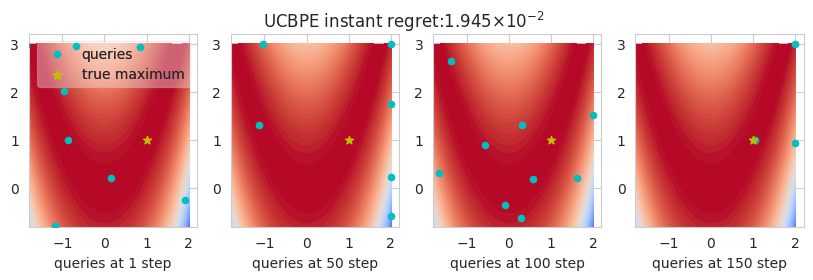

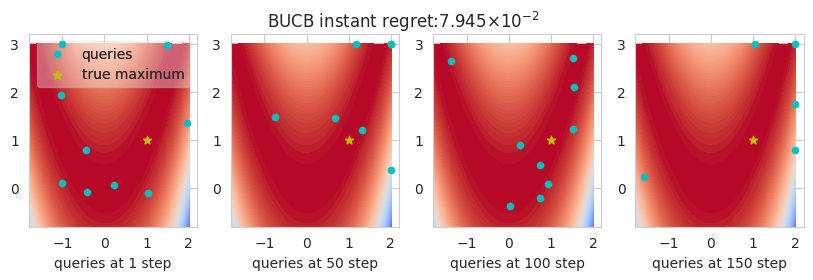

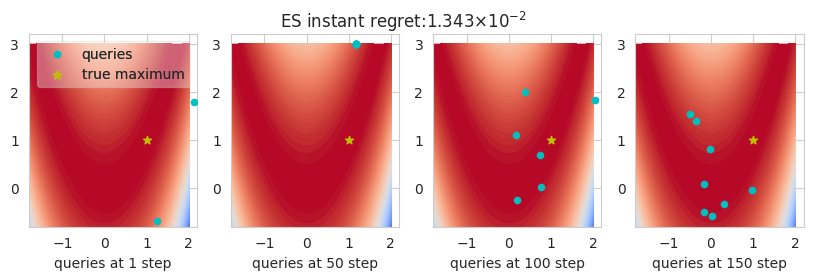

In [16]:
iters_to_show = [1, 50, 100, 150]

def _plot_2d(alg, regret):

    cmap = cm.get_cmap('jet')
    rgba = [cmap(i) for i in np.linspace(0, 1, 5)]

    class ScalarFormatterForceFormat(ticker.ScalarFormatter):
        def _set_format(self):
            self.format = "%1.2f"
    fmt = ScalarFormatterForceFormat()
    fmt.set_powerlimits((0,0))
    fmt.useMathText = True


    first_param_grid = np.linspace(obj.domain[0,0], obj.domain[0,1], 100)
    second_param_grid = np.linspace(obj.domain[1,0], obj.domain[1,1], 100)
    X, Y = np.meshgrid(first_param_grid, second_param_grid, indexing='ij')



    N = 100
    Y_obj = [objective(i) for i in _grid]
    clev1 = np.linspace(min(Y_obj), max(Y_obj),N)

    fig, ax = plt.subplots(1, 4, figsize=(10, 2.5))
    for i in range(len(iters_to_show)): # , sharex=True
        cp1 = ax[i].contourf(X, Y, np.array(Y_obj).reshape(X.shape), clev1,  cmap = cm.coolwarm)
        for c in cp1.collections:
            c.set_edgecolor("face")
        # cbar1 = plt.colorbar(cp1, ax=ax[i], shrink = 0.9, format=fmt, pad = 0.05, location='right')
        # cbar1.ax.tick_params(labelsize=10)
        # cbar1.ax.locator_params(nbins=5)
        ax[i].autoscale(False)
        # for j in range(i + 1):
        #     if j == 0:
        #         a1x1, a1x2, aox1, aox2 = get_queries(alg, 0, iters_to_show[j], df)
        #     else:
        #         a1x1, a1x2, aox1, aox2 = get_queries(alg, iters_to_show[j-1], iters_to_show[j], df)
        #     ax[i].scatter(a1x1, a1x2, zorder=10 - j + 1, color = 'c', s = 6, label='Agent 1')
        #     ax[i].scatter(aox1, aox2, zorder=10 - j, color = 'g', s = 6, label='Other agents')
        a1x1, a1x2, aox1, aox2 = get_queries(alg, iters_to_show[i] ,iters_to_show[i] , df)
        if alg == 'BUCB':
            print(aox1, aox2)
            print(a1x1,a1x2)
        x1, x2 = get_argmax_mean(alg, iters_to_show[i], df)
        ax[i].scatter(a1x1, a1x2, zorder=10 - j + 1, color = 'c', s = 20)
        ax[i].scatter(aox1, aox2, zorder=10 - j, color = 'c', s = 20, label='queries')
        # ax[i].scatter(x1, x2, zorder=10 - j + 2, color = 'y', s = 20, label='max mean value')
        ax[i].scatter(obj.arg_min[0][0], obj.arg_min[0][1], color = 'y', zorder=10 - j + 3, marker='*', label='true maximum')
        if i == 0:
            leg1 = ax[i].legend(loc='upper right', fancybox=True, framealpha = 0.2)
            ax[i].add_artist(leg1)
        ax[i].set_xlim([first_param_grid[0] +0.2, first_param_grid[-1] +0.2])
        ax[i].set_ylim([second_param_grid[0] +0.2, second_param_grid[-1] +0.2])
        # ax[i].set_xticks(np.linspace(first_param_grid[0],first_param_grid[-1], 5))
        # ax[i].set_yticks(np.linspace(second_param_grid[0],second_param_grid[-1], 5))
        plt.setp(ax[i].get_yticklabels()[0], visible=False)
        ax[i].tick_params(axis='both', which='both', labelsize=10)

        ax[i].tick_params(axis='both', which='major', labelsize=10)
        ax[i].tick_params(axis='both', which='minor', labelsize=10)
        # fig.subplots_adjust(wspace=0, hspace=0)
        ax[i].yaxis.offsetText.set_fontsize(10)
        ax[i].set_xlabel('queries at {} step'.format(iters_to_show[i]))
        fig.suptitle(alg + ' instant regret:' + str(regret) + r'$\times10^{-2}$')
        fig_name = 'query_dist_' + alg + '.pdf'
        plt.savefig(os.path.join(results_dir, fig_name))


# _plot_2d('UCBPE', 1.762)
# _plot_2d('BUCB', 1.607)
# _plot_2d('ES', 1.349)

# rosenbrock
_plot_2d('UCBPE', 1.945)
_plot_2d('BUCB', 7.945)
_plot_2d('ES', 1.343)